In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import  scipy.stats

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
df=pd.read_excel("fundrating.xls")
df

,证券代码,证券简称,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,rating201812,rating201903,rating201906,rating201909,rating201912,rating202003,rating202006,rating202009,rating202012,rating202103
0,000008.OF,嘉实中证500ETF联接A,196.283772,-34.183325,1.977781,26.954434,-17.534935,85.576439,28.239101,10.361497,-5.470894,43.522709,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
1,000042.OF,财通中证ESG100指数增强A,140.517546,-7.234080,8.058802,23.046298,-28.004652,39.590166,96.778757,71.302913,13.733820,21.420367,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0
2,000051.OF,华夏沪深300ETF联接A,159.557912,-1.253397,3.160615,30.185585,-33.218832,65.380204,48.437670,61.230443,-11.637528,17.812701,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,000059.OF,国联安中证医药100A,151.682814,-26.391769,26.010233,18.735425,39.537609,182.540309,8.722177,-4.521913,-3.309377,58.350477,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
4,000082.OF,嘉实研究阿尔法,151.446536,4.614825,18.091600,40.739671,-19.035017,122.956630,72.903833,70.871526,5.666824,49.752389,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,960022.OF,博时裕富沪深300R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2334,970041.OF,国海证券量化优选一年持有A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2335,970042.OF,国海证券量化优选一年持有C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2336,F161604.OF,融通深证100H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_new=df.copy()
#将万得未覆盖评级的基金暂定为0星，用于作图
#df_new.loc[:,'rating201812':]=df_new.loc[:,'rating201812':].fillna(0)

In [7]:
df_new

,证券代码,证券简称,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,rating201812,rating201903,rating201906,rating201909,rating201912,rating202003,rating202006,rating202009,rating202012,rating202103
0,000008.OF,嘉实中证500ETF联接A,196.283772,-34.183325,1.977781,26.954434,-17.534935,85.576439,28.239101,10.361497,-5.470894,43.522709,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
1,000042.OF,财通中证ESG100指数增强A,140.517546,-7.234080,8.058802,23.046298,-28.004652,39.590166,96.778757,71.302913,13.733820,21.420367,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0
2,000051.OF,华夏沪深300ETF联接A,159.557912,-1.253397,3.160615,30.185585,-33.218832,65.380204,48.437670,61.230443,-11.637528,17.812701,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,000059.OF,国联安中证医药100A,151.682814,-26.391769,26.010233,18.735425,39.537609,182.540309,8.722177,-4.521913,-3.309377,58.350477,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
4,000082.OF,嘉实研究阿尔法,151.446536,4.614825,18.091600,40.739671,-19.035017,122.956630,72.903833,70.871526,5.666824,49.752389,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,960022.OF,博时裕富沪深300R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2334,970041.OF,国海证券量化优选一年持有A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2335,970042.OF,国海证券量化优选一年持有C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2336,F161604.OF,融通深证100H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


查看各个时间段万得基金评级分数的基金数量

In [8]:
data=pd.DataFrame(index=df_new.columns[12:],columns=range(1,6),dtype=np.int64)

for idx in data.index:
    data.loc[idx]=df_new[idx].value_counts().sort_index().values
#各个时段基金总数
fund_num=[]
for i in range(2,12):
    fund_num.append(df_new[df_new.columns[i]].dropna().shape[0])
data['股票型开放基金总数']=fund_num
data['万得基金评级覆盖率']=(data.loc[:,1:5].sum(axis=1)/data['股票型开放基金总数']).apply(lambda x: format(x, '.2%'))
data

,1,2,3,4,5,股票型开放基金总数,万得基金评级覆盖率
rating201812,1.0,5.0,7.0,160.0,29.0,1003,20.14%
rating201903,27.0,58.0,88.0,29.0,7.0,1067,19.59%
rating201906,29.0,65.0,99.0,28.0,7.0,1141,19.98%
rating201909,32.0,70.0,107.0,28.0,8.0,1230,19.92%
rating201912,35.0,80.0,117.0,31.0,10.0,1347,20.27%
rating202003,41.0,93.0,140.0,36.0,12.0,1442,22.33%
rating202006,60.0,134.0,179.0,36.0,15.0,1552,27.32%
rating202009,63.0,145.0,206.0,38.0,19.0,1650,28.55%
rating202012,60.0,137.0,219.0,56.0,20.0,1913,25.72%
rating202103,50.0,115.0,183.0,117.0,52.0,2081,24.84%


查看万得评级与基金连续4个季度收益率的相关系数

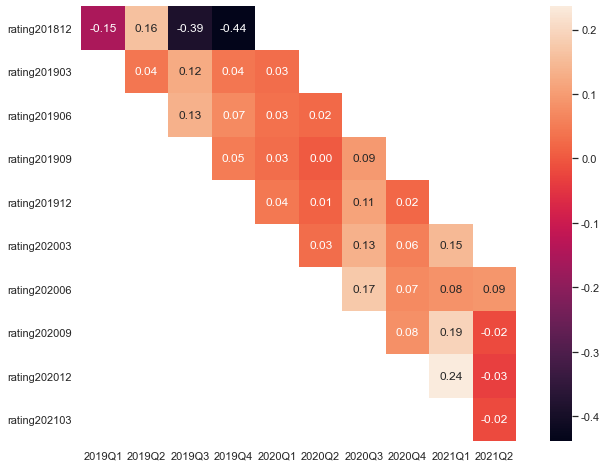

In [9]:
data=df_new.dropna().loc[:,'2019Q1':].corr()

corr=data.loc['rating201812':,'2019Q1':'2021Q2']
mask = np.zeros_like(corr)
#i为行标，j为列标
#mask[np.triu_indices_from(mask)] = True
for i in range(0,10):
    for j in range(0,10):
        if((i-j<-3)|(i-j>0)):
            mask[i][j]=True


#基金评级与区间收益率关系，行为基金评级的月份，列为基金评级下一个季度的区间收益率，我们观察评级后4个月的收益率
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax =sns.heatmap(corr, mask=mask,annot=True,fmt=".2f",square=True)

In [10]:
#将万得未覆盖评级的基金暂定为0星，用于作图
df_new.loc[:,'rating201812':]=df_new.loc[:,'rating201812':].fillna(0)

查看万得基金评级次季度，各个评分段基金收益的均值

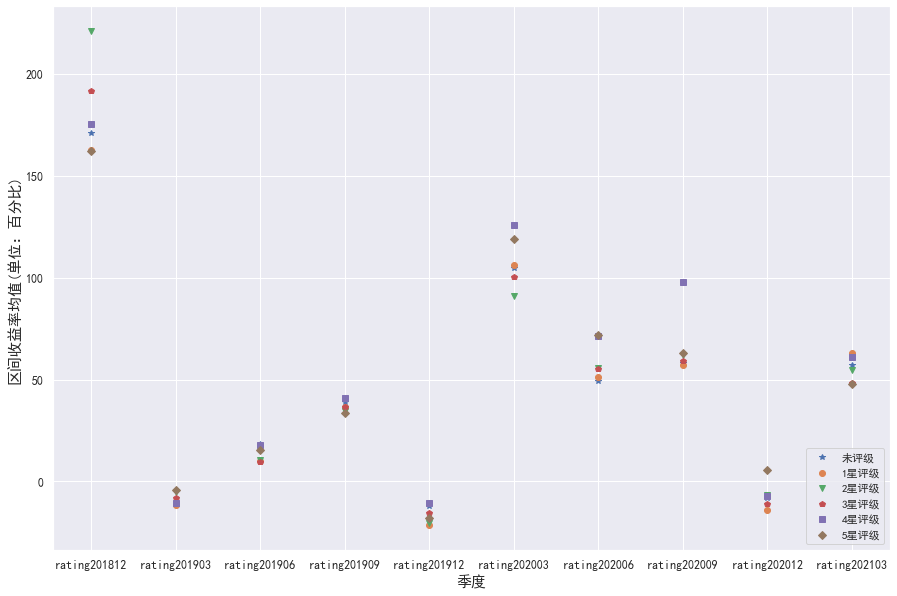

In [11]:
data=pd.DataFrame(index=df_new.columns[12:22],columns=range(0,6),dtype=np.int64)
i=12
for idx in data.index:
    data.loc[idx]=df_new.groupby(df_new.columns[i]).describe()[df_new.columns[i-10]]['mean']
    _, pval = scipy.stats.mannwhitneyu(df_new[df_new[df_new.columns[i]]==5][df_new.columns[i-10]],
                                    df_new[df_new[df_new.columns[i]]<4][df_new.columns[i-10]].dropna())
    data.loc[idx,'5星评级收益显著性']=pval
    _, pval = scipy.stats.mannwhitneyu(df_new[df_new[df_new.columns[i]]==4][df_new.columns[i-10]],
                                    df_new[df_new[df_new.columns[i]]<4][df_new.columns[i-10]].dropna())
    data.loc[idx,'4星评级收益显著性']=pval
    i=i+1


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index,data[0],'*',label='未评级')
ax.plot(data.index,data[1],'o',label='1星评级')
ax.plot(data.index,data[2],'v',label='2星评级')
ax.plot(data.index,data[3],'p',label='3星评级')
ax.plot(data.index,data[4],'s',label='4星评级')
ax.plot(data.index,data[5],'D',label='5星评级')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('季度',fontsize=15)
plt.ylabel('区间收益率均值(单位：百分比)',fontsize=15)
plt.legend(loc='lower right')
plt.show()

In [12]:
data

,0,1,2,3,4,5,5星评级收益显著性,4星评级收益显著性
rating201812,170.984374,162.869863,221.094480,191.802001,175.300973,162.383534,0.198904,0.218451
rating201903,-10.183434,-11.823611,-5.062589,-8.179753,-10.580687,-4.091925,0.130375,0.317460
rating201906,18.574864,9.776379,10.307028,9.649532,18.068211,15.266315,0.353135,0.236887
rating201909,38.817971,36.458659,34.386802,36.638190,40.752623,33.465453,0.165949,0.113818
rating201912,-11.875823,-21.536977,-20.472341,-15.528869,-10.808734,-18.206654,0.327033,0.269692
rating202003,104.696406,106.351837,91.253750,100.514403,126.082629,119.074120,0.161608,0.016681
rating202006,49.104143,51.252380,55.586023,54.969899,71.220818,71.704814,0.006701,0.000331
rating202009,58.329459,57.320718,62.253422,59.109289,97.966799,62.808585,0.150754,0.000048
rating202012,-7.992978,-14.125569,-6.767849,-10.919833,-7.067915,5.405547,0.000243,0.453572
rating202103,57.375332,62.861187,54.523443,48.205719,61.046450,47.673422,0.353655,0.011953


查看万得基金评级次季度，各个评分段基金收益的方差

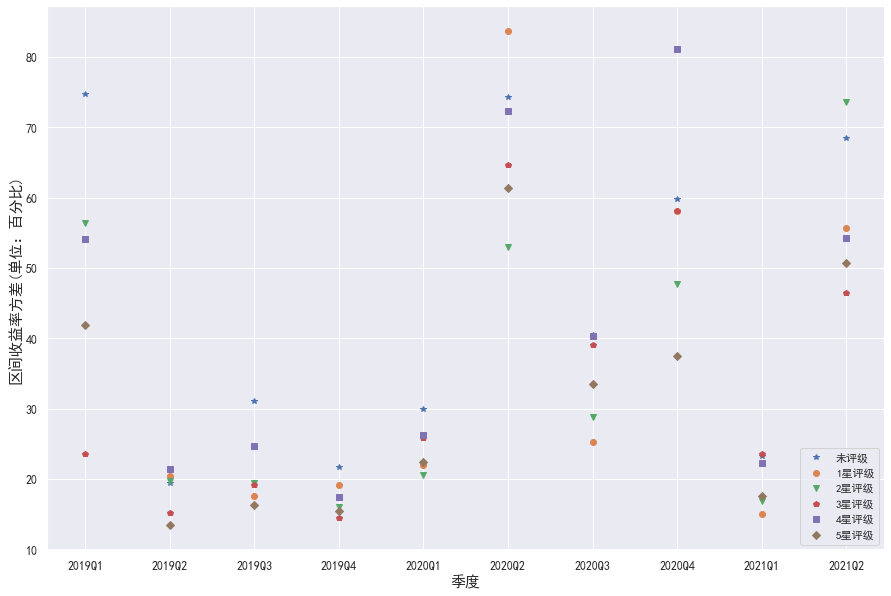

In [13]:
data=pd.DataFrame(index=df_new.columns[2:12],columns=range(0,6),dtype=np.int64)
i=12
for idx in data.index:
    data.loc[idx]=df_new.groupby(df_new.columns[i]).describe()[df_new.columns[i-10]]['std']
    i=i+1


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index,data[0],'*',label='未评级')
ax.plot(data.index,data[1],'o',label='1星评级')
ax.plot(data.index,data[2],'v',label='2星评级')
ax.plot(data.index,data[3],'p',label='3星评级')
ax.plot(data.index,data[4],'s',label='4星评级')
ax.plot(data.index,data[5],'D',label='5星评级')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('季度',fontsize=15)
plt.ylabel('区间收益率方差(单位：百分比)',fontsize=15)
plt.legend(loc='lower right')
plt.show()

In [14]:
data

,0,1,2,3,4,5
2019Q1,74.671220,NaN,56.338300,23.509608,54.139986,41.937289
2019Q2,19.520319,20.385268,19.705794,15.115840,21.459651,13.436438
2019Q3,31.105509,17.582800,19.449996,19.211918,24.774568,16.325735
2019Q4,21.738088,19.211377,15.984902,14.511959,17.442693,15.445977
2020Q1,29.903207,21.973763,20.522656,25.851753,26.312905,22.474245
2020Q2,74.349651,83.675495,52.939041,64.688181,72.349852,61.341538
2020Q3,40.454017,25.328127,28.824332,39.060485,40.325807,33.486784
2020Q4,59.752252,58.096332,47.796483,58.168237,81.074234,37.483894
2021Q1,23.301428,15.114779,16.860290,23.530512,22.362302,17.643790
2021Q2,68.450159,55.652776,73.614000,46.391826,54.283314,50.648661


查看万得基金评级次季度，各个评分段基金收益的中位数

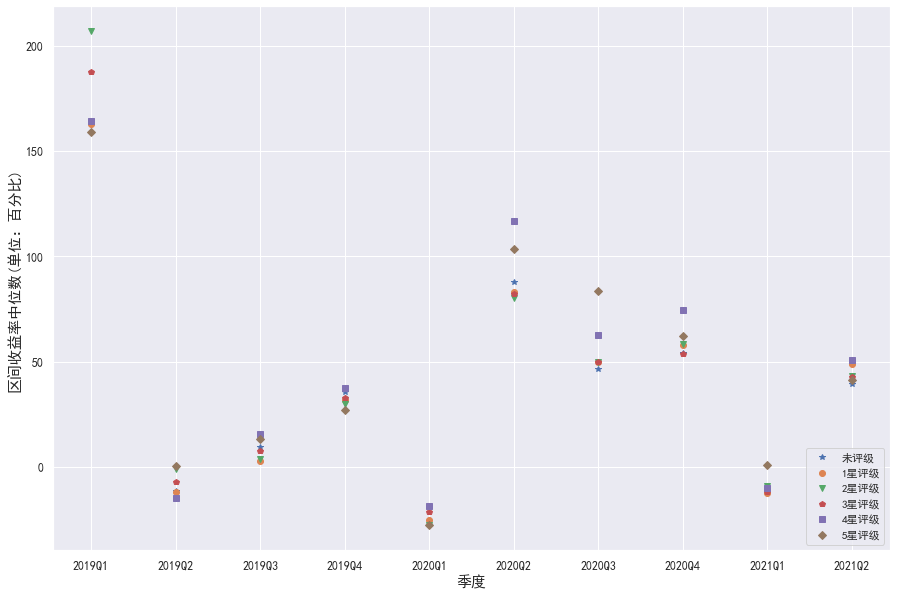

In [15]:
data=pd.DataFrame(index=df_new.columns[2:12],columns=range(0,6),dtype=np.int64)
i=12
for idx in data.index:
    data.loc[idx]=df_new.groupby(df_new.columns[i]).describe()[df_new.columns[i-10]]['50%']
    i=i+1


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index,data[0],'*',label='未评级')
ax.plot(data.index,data[1],'o',label='1星评级')
ax.plot(data.index,data[2],'v',label='2星评级')
ax.plot(data.index,data[3],'p',label='3星评级')
ax.plot(data.index,data[4],'s',label='4星评级')
ax.plot(data.index,data[5],'D',label='5星评级')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('季度',fontsize=15)
plt.ylabel('区间收益率中位数(单位：百分比)',fontsize=15)
plt.legend(loc='lower right')
plt.show()

In [16]:
data

,0,1,2,3,4,5
2019Q1,164.114411,162.869863,206.992845,187.791515,164.298305,159.150850
2019Q2,-11.523505,-12.186034,-0.989984,-7.336621,-14.725530,0.219528
2019Q3,9.343260,2.988992,3.680241,7.559933,15.472915,12.975738
2019Q4,35.449003,31.831043,29.935637,32.925939,37.320152,27.188766
2020Q1,-18.972682,-25.223466,-27.793746,-21.647683,-18.475749,-27.731343
2020Q2,87.788735,82.821672,80.091666,81.875711,116.875461,103.414006
2020Q3,46.416054,49.902692,49.848078,49.665111,62.552878,83.308659
2020Q4,53.902786,57.793106,58.329055,53.508358,74.711819,62.028419
2021Q1,-9.678965,-12.351729,-9.033342,-11.912612,-9.947221,0.770150
2021Q2,39.396901,48.899656,43.211332,42.849485,50.897201,41.395452


查看5星及4星评级基金的25%分位数是否大于未评级及低评级基金

In [17]:
data=pd.DataFrame(index=df_new.columns[2:12])
i=12
for idx in data.index:
    data.loc[idx,'未评级及4星以下基金收益率中位数']=df_new[df_new[df_new.columns[i]]<4][df_new.columns[i-10]].dropna().describe()['50%']
    data.loc[idx,'5星评级收益率25%分为数']=df_new[df_new[df_new.columns[i]]==5][df_new.columns[i-10]].describe()['25%']
    data.loc[idx,'4星评级收益率25%分为数']=df_new[df_new[df_new.columns[i]]==4][df_new.columns[i-10]].describe()['25%']
    i=i+1

In [18]:
data

,未评级及4星以下基金收益率中位数,5星评级收益率25%分为数,4星评级收益率25%分为数
2019Q1,164.733051,144.170294,141.348102
2019Q2,-10.429888,-7.997550,-28.452388
2019Q3,8.554679,6.087486,1.657577
2019Q4,34.726545,24.523121,30.145475
2020Q1,-19.604073,-30.059635,-33.250253
2020Q2,86.647990,69.800653,80.393823
2020Q3,47.705930,47.429344,50.814352
2020Q4,54.020834,45.704251,52.495723
2021Q1,-9.864541,-2.679501,-21.879147
2021Q2,40.844314,13.309696,26.173038


data=df_new.loc[:,['2019Q2',"rating202003"]].dropna()
data=data.rename(columns={'2019Q2':'2019Q2区间收益率','rating202003':'万得评分'})
g = sns.FacetGrid(data, row="万得评分",  aspect=2,
                  height=2)
g.map(sns.kdeplot, "2019Q2区间收益率")
plt.show()

查看连续10季度万得评级基金收益率分布散点图

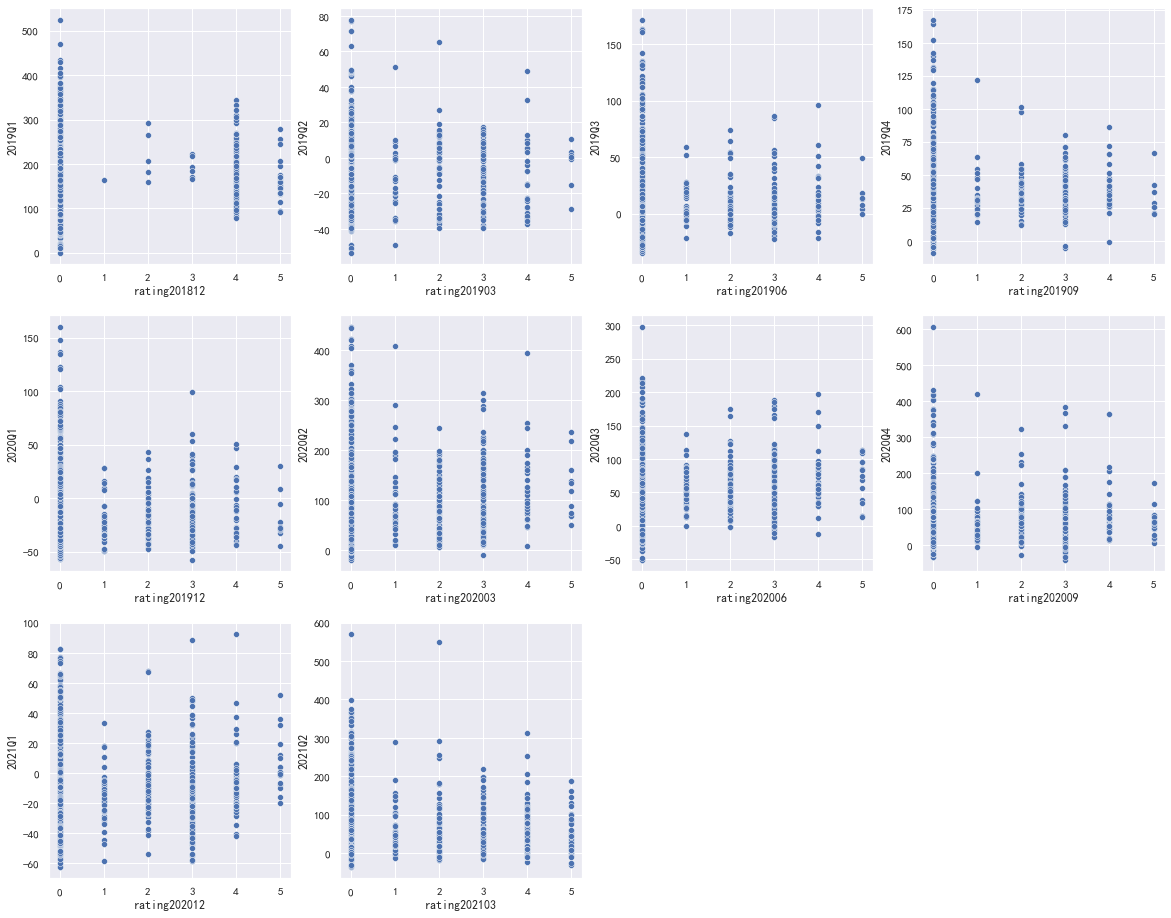

In [19]:
fig = plt.figure(figsize=(20,16))
#2019年全年
ax=fig.add_subplot(3, 4, 1)
sns.scatterplot(x="rating201812", y="2019Q1",
                    data=df_new)
ax=fig.add_subplot(3, 4, 2)
sns.scatterplot(x="rating201903", y="2019Q2",
                    data=df_new)
ax=fig.add_subplot(3, 4, 3)
sns.scatterplot(x="rating201906", y="2019Q3",
                    data=df_new)
ax=fig.add_subplot(3, 4, 4)
sns.scatterplot(x="rating201909", y="2019Q4",
                    data=df_new)
#2020年全年
ax=fig.add_subplot(3, 4, 5)
sns.scatterplot(x="rating201912", y="2020Q1",
                    data=df_new)
ax=fig.add_subplot(3, 4, 6)
sns.scatterplot(x="rating202003", y="2020Q2",
                    data=df_new)
ax=fig.add_subplot(3, 4, 7)
sns.scatterplot(x="rating202006", y="2020Q3",
                    data=df_new)
ax=fig.add_subplot(3, 4, 8)
sns.scatterplot(x="rating202009", y="2020Q4",
                    data=df_new)

#2021年前两季度
ax=fig.add_subplot(3, 4, 9)
sns.scatterplot(x="rating202012", y="2021Q1",
                    data=df_new)
ax=fig.add_subplot(3, 4, 10)
sns.scatterplot(x="rating202103", y="2021Q2",
                    data=df_new)
plt.show()

查看连续10季度万得评级基金收益率分布箱线图

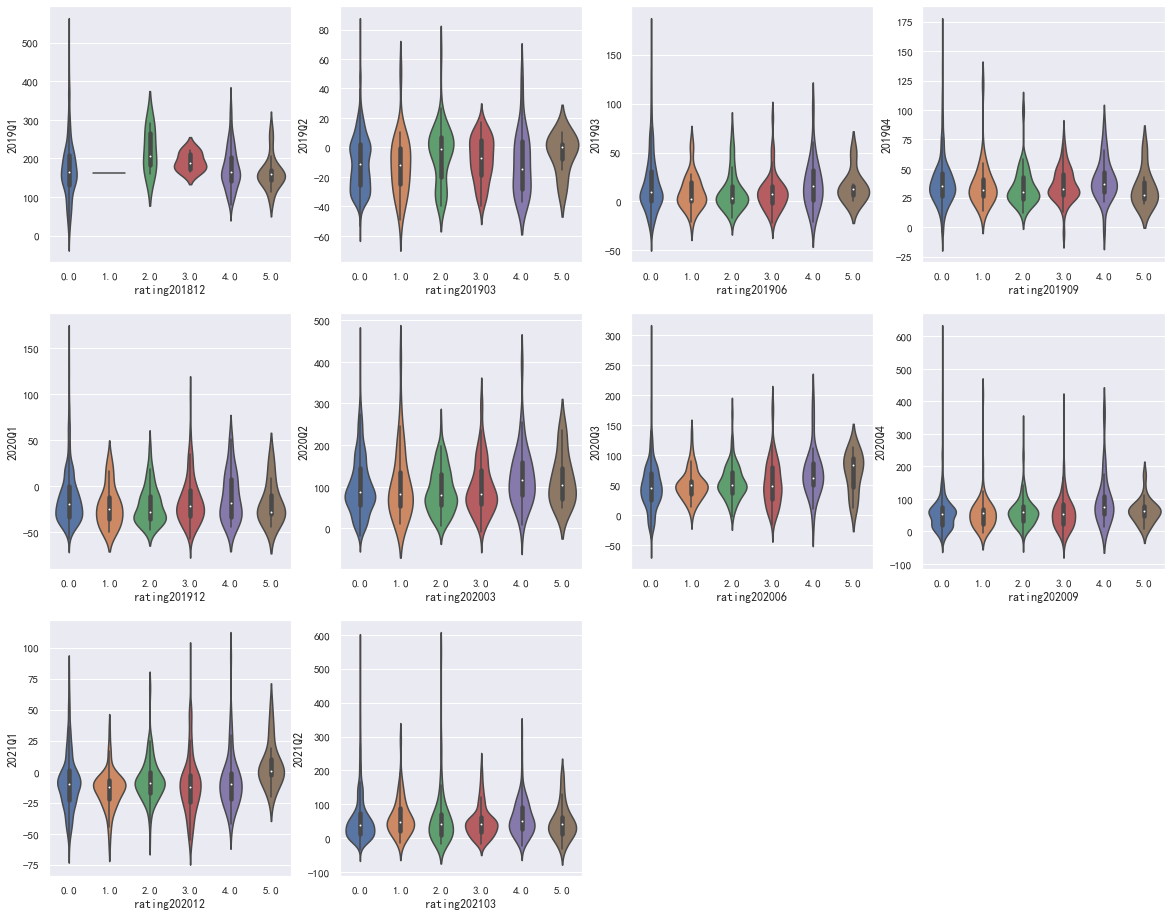

In [20]:
fig = plt.figure(figsize=(20,16))
#2019年全年
ax=fig.add_subplot(3, 4, 1)
sns.violinplot(x="rating201812", y="2019Q1",
                    data=df_new)
ax=fig.add_subplot(3, 4, 2)
sns.violinplot(x="rating201903", y="2019Q2",
                    data=df_new)
ax=fig.add_subplot(3, 4, 3)
sns.violinplot(x="rating201906", y="2019Q3",
                    data=df_new)
ax=fig.add_subplot(3, 4, 4)
sns.violinplot(x="rating201909", y="2019Q4",
                    data=df_new)
#2020年全年
ax=fig.add_subplot(3, 4, 5)
sns.violinplot(x="rating201912", y="2020Q1",
                    data=df_new)
ax=fig.add_subplot(3, 4, 6)
sns.violinplot(x="rating202003", y="2020Q2",
                    data=df_new)
ax=fig.add_subplot(3, 4, 7)
sns.violinplot(x="rating202006", y="2020Q3",
                    data=df_new)
ax=fig.add_subplot(3, 4, 8)
sns.violinplot(x="rating202009", y="2020Q4",
                    data=df_new)

#2021年前两季度
ax=fig.add_subplot(3, 4, 9)
sns.violinplot(x="rating202012", y="2021Q1",
                    data=df_new)
ax=fig.add_subplot(3, 4, 10)
sns.violinplot(x="rating202103", y="2021Q2",
                    data=df_new)
plt.show()

In [21]:
data=pd.DataFrame(index=df_new.columns[2:12])
i=12
for idx in data.index:
    data.loc[idx,'未评级及4星以下基金收益率中位数']=df_new[df_new[df_new.columns[i]]<4][df_new.columns[i-10]].dropna().describe()['50%']
    data.loc[idx,'5星评级收益率25%分为数']=df_new[df_new[df_new.columns[i]]==5][df_new.columns[i-10]].describe()['25%']
    data.loc[idx,'4星评级收益率25%分为数']=df_new[df_new[df_new.columns[i]]==4][df_new.columns[i-10]].describe()['25%']
    i=i+1

In [22]:
data

,未评级及4星以下基金收益率中位数,5星评级收益率25%分为数,4星评级收益率25%分为数
2019Q1,164.733051,144.170294,141.348102
2019Q2,-10.429888,-7.997550,-28.452388
2019Q3,8.554679,6.087486,1.657577
2019Q4,34.726545,24.523121,30.145475
2020Q1,-19.604073,-30.059635,-33.250253
2020Q2,86.647990,69.800653,80.393823
2020Q3,47.705930,47.429344,50.814352
2020Q4,54.020834,45.704251,52.495723
2021Q1,-9.864541,-2.679501,-21.879147
2021Q2,40.844314,13.309696,26.173038


In [23]:
df_new[df_new['rating201812']==5]['证券代码'].values

array(['000051.OF', '020011.OF', '040180.OF', '100032.OF', '100038.OF',
       '159901.OF', '159903.OF', '160119.OF', '160706.OF', '162213.OF',
       '163808.OF', '165309.OF', '202015.OF', '240014.OF', '270010.OF',
       '320010.OF', '399011.OF', '410008.OF', '450009.OF', '481009.OF',
       '510050.OF', '510060.OF', '510110.OF', '510130.OF', '510180.OF',
       '510880.OF', '519100.OF', '519180.OF', '540006.OF'], dtype=object)

In [24]:
df_new[df_new['rating201903']==5]['证券代码'].values

array(['000311.OF', '000478.OF', '100038.OF', '163407.OF', '399011.OF',
       '450009.OF', '540006.OF'], dtype=object)

In [25]:
df_new[df_new['rating201906']==5]['证券代码'].values

array(['000311.OF', '000478.OF', '100038.OF', '320020.OF', '399011.OF',
       '450009.OF', '540006.OF'], dtype=object)

In [26]:
df_new[df_new['rating201909']==5]['证券代码'].values

array(['000311.OF', '000478.OF', '100038.OF', '110022.OF', '320020.OF',
       '399011.OF', '450009.OF', '540006.OF'], dtype=object)

In [27]:
df_new[df_new['rating201912']==5]['证券代码'].values

array(['000478.OF', '000751.OF', '100038.OF', '110022.OF', '162216.OF',
       '320020.OF', '399011.OF', '450009.OF', '519116.OF', '540006.OF'],
      dtype=object)

In [28]:
df_new[df_new['rating202003']==5]['证券代码'].values

array(['000751.OF', '100038.OF', '110022.OF', '160133.OF', '162216.OF',
       '163407.OF', '320020.OF', '320022.OF', '399011.OF', '450009.OF',
       '519116.OF', '540006.OF'], dtype=object)

In [29]:
df_new[df_new['rating202006']==5]['证券代码'].values

array(['000628.OF', '000751.OF', '001104.OF', '001178.OF', '100038.OF',
       '110022.OF', '162216.OF', '163808.OF', '320020.OF', '399011.OF',
       '450009.OF', '519116.OF', '519714.OF', '540006.OF', '540009.OF'],
      dtype=object)

In [30]:
df_new[df_new['rating202009']==5]['证券代码'].values

array(['000478.OF', '000628.OF', '000991.OF', '001104.OF', '001186.OF',
       '001410.OF', '001528.OF', '001651.OF', '161017.OF', '162216.OF',
       '163808.OF', '320020.OF', '320022.OF', '399011.OF', '450009.OF',
       '502000.OF', '519714.OF', '540006.OF', '540009.OF'], dtype=object)

In [31]:
df_new[df_new['rating202012']==5]['证券代码'].values

array(['000326.OF', '000991.OF', '001054.OF', '001104.OF', '001186.OF',
       '001473.OF', '001651.OF', '001677.OF', '001705.OF', '001714.OF',
       '001736.OF', '002311.OF', '002316.OF', '162216.OF', '163808.OF',
       '320020.OF', '450009.OF', '502000.OF', '519714.OF', '540009.OF'],
      dtype=object)

In [32]:
df_new[df_new['rating202103']==5]['证券代码'].values

array(['000326.OF', '000596.OF', '000656.OF', '000975.OF', '000991.OF',
       '001104.OF', '001186.OF', '001208.OF', '001473.OF', '001577.OF',
       '001605.OF', '001714.OF', '001717.OF', '001718.OF', '002199.OF',
       '002236.OF', '002311.OF', '002316.OF', '002334.OF', '050021.OF',
       '159908.OF', '160224.OF', '160420.OF', '160517.OF', '160628.OF',
       '161032.OF', '161121.OF', '161628.OF', '161721.OF', '161811.OF',
       '162510.OF', '163114.OF', '163116.OF', '163808.OF', '164401.OF',
       '164818.OF', '165806.OF', '167301.OF', '168203.OF', '202211.OF',
       '213010.OF', '240019.OF', '320020.OF', '320022.OF', '450009.OF',
       '501005.OF', '501006.OF', '502000.OF', '502040.OF', '512990.OF',
       '519714.OF', '540009.OF'], dtype=object)